# HOMEWORK 3 
# Ezgi Aydın
The purpose of this homework is to review and practice fundamental machine learning concepts.
As a first step I will read the data and perform data cleaning, Then feature engineering, variable selection, train-test split, optimization, and model accuracy assessment

Part 1: Importing Data & Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cses4_cut.csv")

In [3]:
df.head()

,Unnamed: 0,D2002,D2003,D2004,D2005,D2006,D2007,D2008,D2009,D2010,...,D2024,D2025,D2026,D2027,D2028,D2029,D2030,D2031,age,voted
0,0,1,4,4,2,2,9,9,9,1,...,9,9,8300,121,8,999,999,4,31,True
1,1,2,3,1,2,2,9,9,9,8,...,6,9,1101,121,12,999,999,4,42,True
2,2,2,2,1,2,2,9,9,9,7,...,5,9,1101,121,2,999,999,4,67,True
3,4,2,4,4,2,2,9,9,9,5,...,9,9,8300,121,2,999,999,4,26,False
4,5,1,6,4,1,1,9,9,9,1,...,1,9,1101,121,2,999,999,4,55,True


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head()

,D2002,D2003,D2004,D2005,D2006,D2007,D2008,D2009,D2010,D2011,...,D2024,D2025,D2026,D2027,D2028,D2029,D2030,D2031,age,voted
0,1,4,4,2,2,9,9,9,1,422,...,9,9,8300,121,8,999,999,4,31,True
1,2,3,1,2,2,9,9,9,8,999,...,6,9,1101,121,12,999,999,4,42,True
2,2,2,1,2,2,9,9,9,7,818,...,5,9,1101,121,2,999,999,4,67,True
3,2,4,4,2,2,9,9,9,5,513,...,9,9,8300,121,2,999,999,4,26,False
4,1,6,4,1,1,9,9,9,1,235,...,1,9,1101,121,2,999,999,4,55,True


In [6]:
df.isnull().sum()

D2002    0
D2003    0
D2004    0
D2005    0
D2006    0
D2007    0
D2008    0
D2009    0
D2010    0
D2011    0
D2012    0
D2013    0
D2014    0
D2015    0
D2016    0
D2017    0
D2018    0
D2019    0
D2020    0
D2021    0
D2022    0
D2023    0
D2024    0
D2025    0
D2026    0
D2027    0
D2028    0
D2029    0
D2030    0
D2031    0
age      0
voted    0
dtype: int64

In [7]:
df.shape

(12451, 32)

In [8]:
df_observe = df.copy()

In [9]:
#there seems no null values, however according to the source (https://cses.org/wp-content/uploads/2019/03/cses4_Questionnaire.txt) provided in the document, there are values representing the missing values. So I will first convert those values and drop them. Also will change the column names according to codebook.

In [10]:
# convert all missing values (ex. 9, 99 or 999) I have performed this part to observe which colums have the most null values but I am excluding it because it breaks my classifiers somehow.
df_observe.loc[df_observe.D2002 > 2, 'D2002'] = np.nan
df_observe.loc[df_observe.D2003 > 96, 'D2003'] = np.nan
df_observe.loc[df_observe.D2004 > 6, 'D2004'] = np.nan
df_observe.loc[df_observe.D2005 > 2, 'D2005'] = np.nan
df_observe.loc[df_observe.D2006 > 2, 'D2006'] = np.nan
df_observe.loc[df_observe.D2007 > 2, 'D2007'] = np.nan
df_observe.loc[df_observe.D2008 > 2, 'D2008'] = np.nan
df_observe.loc[df_observe.D2009 > 2, 'D2009'] = np.nan
df_observe.loc[df_observe.D2010 > 96, 'D2010'] = np.nan
df_observe.loc[df_observe.D2011 > 995, 'D2011'] = np.nan
df_observe.loc[df_observe.D2012 > 6, 'D2012'] = np.nan
df_observe.loc[df_observe.D2013 > 6, 'D2013'] = np.nan
df_observe.loc[df_observe.D2014 > 6, 'D2014'] = np.nan
df_observe.loc[df_observe.D2015 > 96, 'D2015'] = np.nan
df_observe.loc[df_observe.D2016 > 996, 'D2016'] = np.nan
df_observe.loc[df_observe.D2017 > 6, 'D2017'] = np.nan
df_observe.loc[df_observe.D2018 > 6, 'D2018'] = np.nan
df_observe.loc[df_observe.D2019 > 6, 'D2019'] = np.nan
df_observe.loc[df_observe.D2020 > 6, 'D2020'] = np.nan
df_observe.loc[df_observe.D2021 > 96, 'D2021'] = np.nan
df_observe.loc[df_observe.D2022 > 96, 'D2022'] = np.nan
df_observe.loc[df_observe.D2023 > 96, 'D2023'] = np.nan
df_observe.loc[df_observe.D2024 > 6, 'D2024'] = np.nan
df_observe.loc[df_observe.D2025 > 6, 'D2025'] = np.nan
df_observe.loc[df_observe.D2026 > 96, 'D2026'] = np.nan
df_observe.loc[df_observe.D2027 > 996, 'D2027'] = np.nan
df_observe.loc[df_observe.D2028 == 99, 'D2028'] = np.nan
df_observe.loc[df_observe.D2029 > 996, 'D2029'] = np.nan
df_observe.loc[df_observe.D2030 > 996, 'D2030'] = np.nan
df_observe.loc[df_observe.D2031 > 6, 'D2031'] = np.nan

In [11]:
# Renaming columns in accordance with the codebook
df = df.rename({"D2002": "GENDER", "D2003": "EDUCATION", "D2004": "MARITAL STATUS",
                "D2005": "UNION MEMBERSHIP OF RESPONDENT", "D2006": "UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD",
                "D2007": "BUSINESS OR EMPLOYERS' ASSOCIATION MEMBERSHIP", "D2008": "FARMERS' ASSOCIATION MEMBERSHIP",
                "D2009": "PROFESSIONAL ASSOCIATION MEMBERSHIP", "D2010": "CURRENT EMPLOYMENT STATUS",
                "D2011": "MAIN OCCUPATION", "D2012": "SOCIO ECONOMIC STATUS", "D2013": "EMPLOYMENT TYPE - PUBLIC OR PRIVATE",
                "D2014": "INDUSTRIAL SECTOR", "D2015": "SPOUSE: CURRENT EMPLOYMENT STATUS", "D2016": "SPOUSE: OCCUPATION",
                "D2017": "SPOUSE: SOCIO ECONOMIC STATUS", "D2018": "SPOUSE: EMPLOYMENT TYPE - PUBLIC OR PRIVATE",
                "D2019": "SPOUSE: INDUSTRIAL SECTOR", "D2020": "HOUSEHOLD INCOME", "D2021": "NUMBER IN HOUSEHOLD IN TOTAL",
                "D2022": "NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18", "D2023": "NUMBER IN HOUSEHOLD UNDER AGE 6",
                "D2024": "RELIGIOUS SERVICES ATTENDANCE", "D2025": "RELIGIOSITY", "D2026": "RELIGIOUS DENOMINATION",
                "D2027": "LANGUAGE USUALLY SPOKEN AT HOME", "D2028": "REGION OF RESIDENCE", "D2029": "RACE",
                "D2030": "ETHNICITY", "D2031": "RURAL OR URBAN RESIDENCE", "age": "AGE", "voted": "VOTED"}, axis=1)

In [12]:
#right below we see which columns have how much null values. I will drop the columns with null values larger than 50% ish. So the first 11 columns below will be dropped.

In [13]:
df_observe.isnull().sum().sort_values(ascending=False)

D2026    12451
D2017    10552
D2016    10515
D2030    10075
D2018     9274
D2019     9244
D2011     7751
D2015     7200
D2007     7147
D2009     7147
D2008     7146
D2012     6663
D2029     5565
D2014     5531
D2013     5307
D2027     4829
D2031     4822
D2023     4091
D2022     3469
D2025     3223
D2020     2558
D2006     2335
D2021     1923
D2005     1190
D2028     1103
D2004      774
D2024      344
D2010       64
D2003       40
age          0
D2002        0
voted        0
dtype: int64

In [14]:
#dropping columns with highest null values

In [15]:
cleanDf = df.drop(columns =["RELIGIOUS DENOMINATION","SPOUSE: SOCIO ECONOMIC STATUS","SPOUSE: OCCUPATION","ETHNICITY","SPOUSE: EMPLOYMENT TYPE - PUBLIC OR PRIVATE","SPOUSE: INDUSTRIAL SECTOR","MAIN OCCUPATION","SPOUSE: CURRENT EMPLOYMENT STATUS","BUSINESS OR EMPLOYERS' ASSOCIATION MEMBERSHIP","PROFESSIONAL ASSOCIATION MEMBERSHIP","FARMERS' ASSOCIATION MEMBERSHIP"], axis=1)

In [16]:
cleanDf.head()

,GENDER,EDUCATION,MARITAL STATUS,UNION MEMBERSHIP OF RESPONDENT,UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD,CURRENT EMPLOYMENT STATUS,SOCIO ECONOMIC STATUS,EMPLOYMENT TYPE - PUBLIC OR PRIVATE,INDUSTRIAL SECTOR,HOUSEHOLD INCOME,...,NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18,NUMBER IN HOUSEHOLD UNDER AGE 6,RELIGIOUS SERVICES ATTENDANCE,RELIGIOSITY,LANGUAGE USUALLY SPOKEN AT HOME,REGION OF RESIDENCE,RACE,RURAL OR URBAN RESIDENCE,AGE,VOTED
0,1,4,4,2,2,1,1,2,3,3,...,0,99,9,9,121,8,999,4,31,True
1,2,3,1,2,2,8,9,9,9,1,...,3,99,6,9,121,12,999,4,42,True
2,2,2,1,2,2,7,2,2,2,9,...,0,99,5,9,121,2,999,4,67,True
3,2,4,4,2,2,5,1,2,3,9,...,2,99,9,9,121,2,999,4,26,False
4,1,6,4,1,1,1,1,1,3,5,...,0,99,1,9,121,2,999,4,55,True


In [17]:
cleanDf.apply(pd.to_numeric, errors='coerce')

,GENDER,EDUCATION,MARITAL STATUS,UNION MEMBERSHIP OF RESPONDENT,UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD,CURRENT EMPLOYMENT STATUS,SOCIO ECONOMIC STATUS,EMPLOYMENT TYPE - PUBLIC OR PRIVATE,INDUSTRIAL SECTOR,HOUSEHOLD INCOME,...,NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18,NUMBER IN HOUSEHOLD UNDER AGE 6,RELIGIOUS SERVICES ATTENDANCE,RELIGIOSITY,LANGUAGE USUALLY SPOKEN AT HOME,REGION OF RESIDENCE,RACE,RURAL OR URBAN RESIDENCE,AGE,VOTED
0,1,4,4,2,2,1,1,2,3,3,...,0,99,9,9,121,8,999,4,31,True
1,2,3,1,2,2,8,9,9,9,1,...,3,99,6,9,121,12,999,4,42,True
2,2,2,1,2,2,7,2,2,2,9,...,0,99,5,9,121,2,999,4,67,True
3,2,4,4,2,2,5,1,2,3,9,...,2,99,9,9,121,2,999,4,26,False
4,1,6,4,1,1,1,1,1,3,5,...,0,99,1,9,121,2,999,4,55,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,2,4,1,2,2,1,9,9,9,2,...,0,99,1,9,999,55,1,9,62,True
12447,1,3,1,2,2,9,9,9,9,1,...,0,99,1,9,999,17,1,9,65,True
12448,2,6,2,2,2,1,9,9,9,3,...,2,99,4,9,999,19,1,9,61,True
12449,2,7,1,2,1,1,9,9,9,4,...,2,99,6,9,999,25,1,9,53,True


In [18]:
cleanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   GENDER                                        12451 non-null  int64
 1   EDUCATION                                     12451 non-null  int64
 2   MARITAL STATUS                                12451 non-null  int64
 3   UNION MEMBERSHIP OF RESPONDENT                12451 non-null  int64
 4   UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD       12451 non-null  int64
 5   CURRENT EMPLOYMENT STATUS                     12451 non-null  int64
 6   SOCIO ECONOMIC STATUS                         12451 non-null  int64
 7   EMPLOYMENT TYPE - PUBLIC OR PRIVATE           12451 non-null  int64
 8   INDUSTRIAL SECTOR                             12451 non-null  int64
 9   HOUSEHOLD INCOME                              12451 non-null  int64
 10  NUMBER IN 

In [19]:
#Now data is cleaner, I will not manipulate other missing values, we will perform imputation for them on the next steps.

In [20]:
#splitting train and test data

In [21]:
X = cleanDf.iloc[:, :-1]
y = cleanDf.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)


In [22]:
#let's see classifier accuracies before any reduction

In [23]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=2)

In [24]:
#Logistic Regression
LR = LogisticRegression()
LR_accuracy=cross_val_score(LR, X, y, cv=cv).mean()

#K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_accuracy=cross_val_score(KNN, X, y, cv=cv).mean()


#Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
LDA_accuracy=cross_val_score(LDA, X, y, cv=cv).mean()

#Decision Tree
decision_tree = DecisionTreeClassifier()
DT_accuracy=cross_val_score(decision_tree, X, y, cv=cv).mean()


#Support Vector Machine
SVM = SVC(probability = True)
SVM_accuracy=cross_val_score(SVM, X, y, cv=cv).mean()


#Quadratic Discriminant Analysis
QDA = QuadraticDiscriminantAnalysis()
QDA_accuracy=cross_val_score(QDA, X, y, cv=cv).mean()

#Random Forest Classifier
random_forest = RandomForestClassifier()
RF_accuracy=cross_val_score(random_forest, X, y, cv=cv).mean()

#Naive Bayes
naive_bayes = GaussianNB()
NB_accuracy=cross_val_score(naive_bayes, X, y, cv=cv).mean()

pd.options.display.float_format = '{:,.2f}%'.format
accuracies_before = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'K-Nearest Neighbors', 'Linear Discriminant Analysis','Decision Tree', 'Support Vector Machine', 'Quadratic Discriminant Analysis', 'Random Forest','Bayes'],
    'Accuracy'    : [100*LR_accuracy, 100*KNN_accuracy, 100*LDA_accuracy, 100*DT_accuracy, 100*SVM_accuracy, 100*QDA_accuracy, 100*RF_accuracy, 100*NB_accuracy],
    }, columns = ['Model', 'Accuracy'])

accuracies_before = accuracies_before.sort_values(by='Accuracy', ascending=False)

In [25]:
#feature selection
X.shape

X_new = SelectKBest(chi2, k='all').fit_transform(X, y)

score = SelectKBest(chi2, k='all')
fit = score.fit(X, y)
k_scores = fit.scores_

X_new.shape
k_scores

array([1.99145597e-02, 1.52595916e+02, 2.35065634e+02, 3.34961755e+00,
       1.55618389e+02, 1.21612428e+02, 3.60985103e+02, 7.86810805e+02,
       7.59160769e+02, 1.01133731e+01, 2.36160106e+04, 9.67999695e+03,
       7.72843289e+03, 9.32369908e+00, 4.25074084e+02, 4.86518548e+04,
       8.30082095e+03, 4.18624414e+04, 1.14522438e+02, 4.58848059e+03])

In [26]:
X_new

array([[  1,   4,   4, ..., 999,   4,  31],
       [  2,   3,   1, ..., 999,   4,  42],
       [  2,   2,   1, ..., 999,   4,  67],
       ...,
       [  2,   6,   2, ...,   1,   9,  61],
       [  2,   7,   1, ...,   1,   9,  53],
       [  1,   4,   1, ...,   1,   9,  73]], dtype=int64)

In [27]:
# Features in descending order by score
features = pd.DataFrame([cleanDf.columns, k_scores])
features = features.T

features.columns
features = features.sort_values(by=features.columns[1], ascending=False)

In [28]:
highestK_10 = features[:10]

In [29]:
highestK_10

,0,1
15,LANGUAGE USUALLY SPOKEN AT HOME,"48,651.85%"
17,RACE,"41,862.44%"
10,NUMBER IN HOUSEHOLD IN TOTAL,"23,616.01%"
11,NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18,"9,680.00%"
16,REGION OF RESIDENCE,"8,300.82%"
12,NUMBER IN HOUSEHOLD UNDER AGE 6,"7,728.43%"
19,AGE,"4,588.48%"
7,EMPLOYMENT TYPE - PUBLIC OR PRIVATE,786.81%
8,INDUSTRIAL SECTOR,759.16%
14,RELIGIOSITY,425.07%


In [30]:
highscorer_df = df[['LANGUAGE USUALLY SPOKEN AT HOME',"RACE","NUMBER IN HOUSEHOLD IN TOTAL","NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18","REGION OF RESIDENCE","NUMBER IN HOUSEHOLD UNDER AGE 6","AGE","EMPLOYMENT TYPE - PUBLIC OR PRIVATE","INDUSTRIAL SECTOR","RELIGIOSITY"]]

In [31]:
highscorer_df

,LANGUAGE USUALLY SPOKEN AT HOME,RACE,NUMBER IN HOUSEHOLD IN TOTAL,NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18,REGION OF RESIDENCE,NUMBER IN HOUSEHOLD UNDER AGE 6,AGE,EMPLOYMENT TYPE - PUBLIC OR PRIVATE,INDUSTRIAL SECTOR,RELIGIOSITY
0,121,999,3,0,8,99,31,2,3,9
1,121,999,5,3,12,99,42,9,9,9
2,121,999,3,0,2,99,67,2,2,9
3,121,999,7,2,2,99,26,2,3,9
4,121,999,2,0,2,99,55,1,3,9
...,...,...,...,...,...,...,...,...,...,...
12446,999,1,99,0,55,99,62,9,9,9
12447,999,1,99,0,17,99,65,9,9,9
12448,999,1,99,2,19,99,61,9,9,9
12449,999,1,99,2,25,99,53,9,9,9


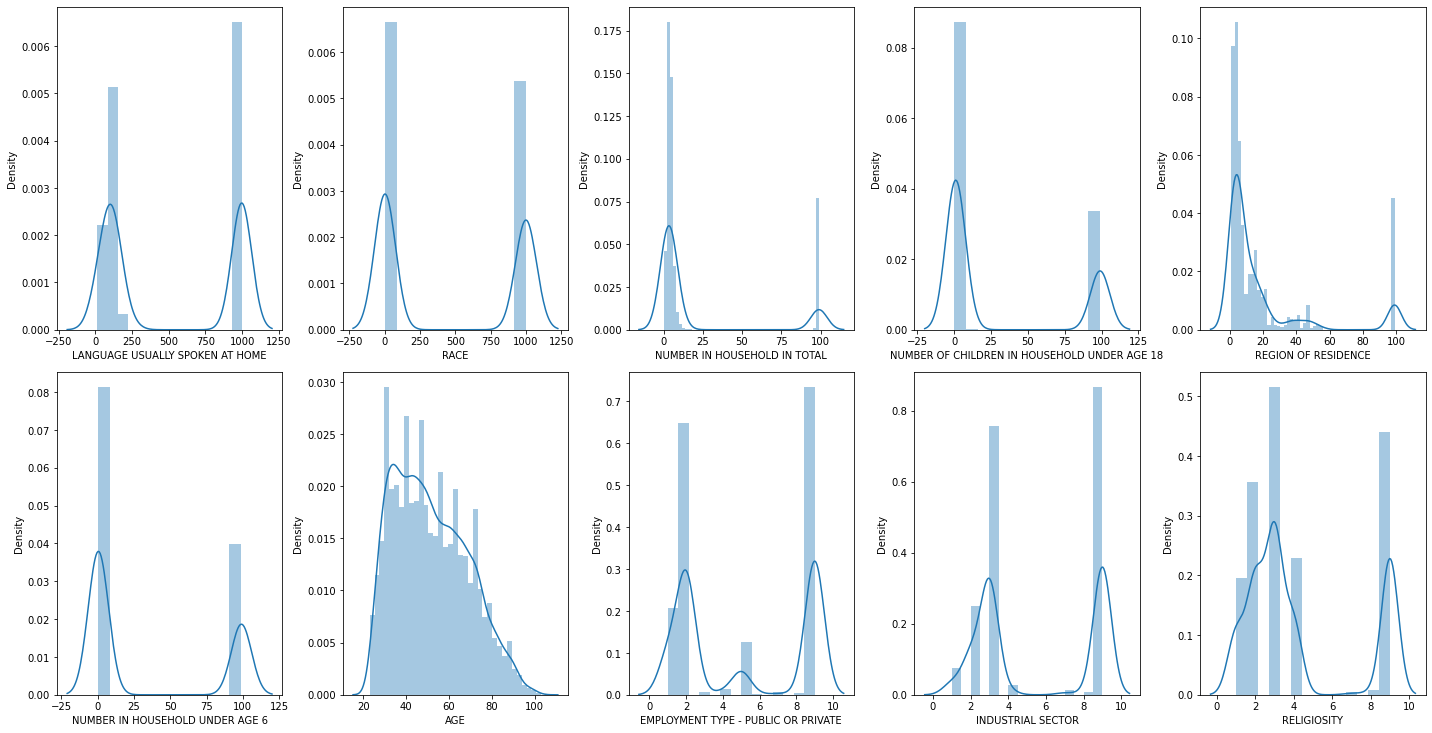

In [32]:
# data distribution of highest features

plt.figure(figsize = (20, 20))
plotnum = 1

for column in highscorer_df:
    if plotnum <= 12:
        ax = plt.subplot(4, 5, plotnum)
        sns.distplot(highscorer_df[column])
        plt.xlabel(column)
        
    plotnum += 1

plt.tight_layout()
plt.show()

In [33]:
#so the data is not normally distributed, need to fix that.
#Pre-processing and transforming in Gaussian form.

quantile_transformer = preprocessing.QuantileTransformer(random_state=10)

highscorer_df_tr = quantile_transformer.fit_transform(highscorer_df)

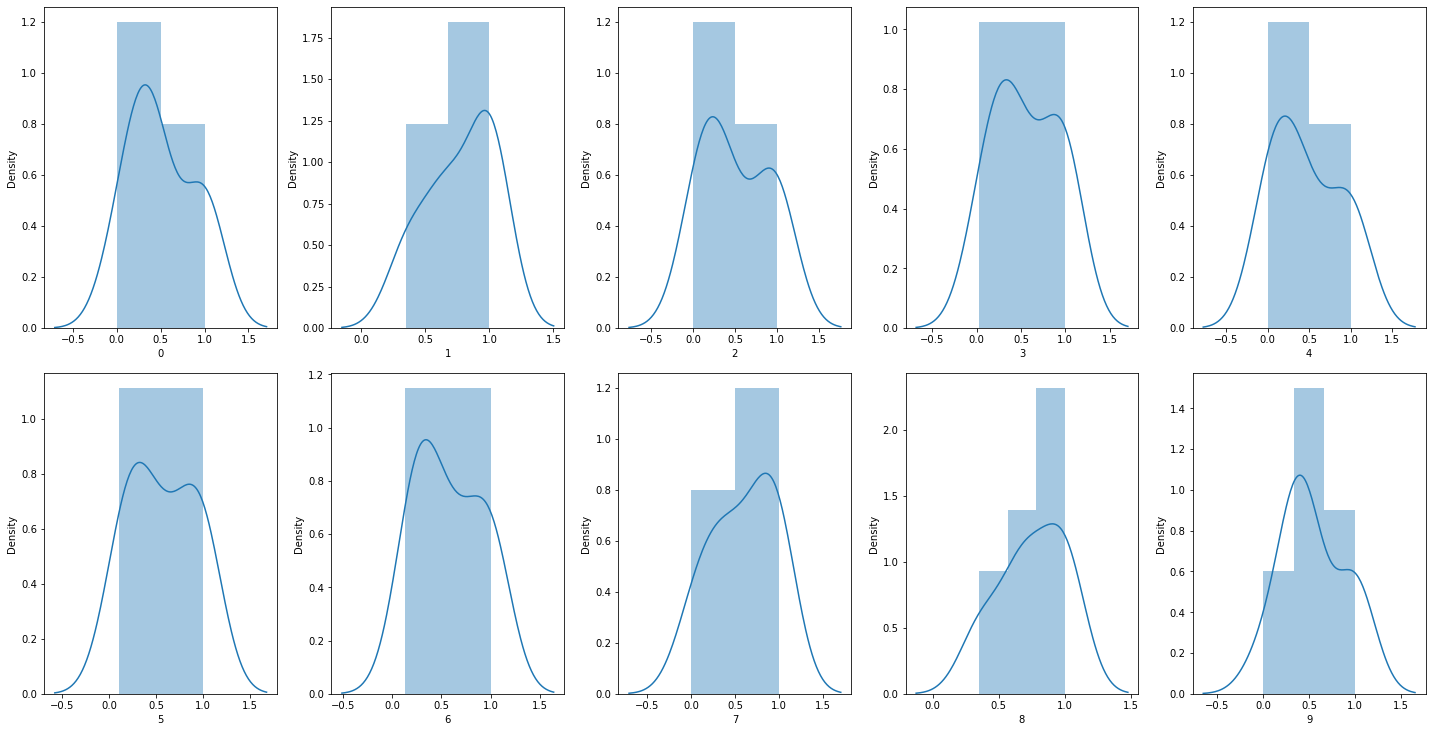

In [34]:
plt.figure(figsize = (20, 20))
plotnum = 1
for column in range(highscorer_df_tr.shape[1]):
    if plotnum <= 12:
        ax = plt.subplot(4, 5, plotnum)
        sns.distplot(highscorer_df_tr[column])
        plt.xlabel(column)
        
    plotnum += 1

plt.tight_layout()
plt.show()

In [35]:
#Classifiers after preprocessing and transforming
#Logistic Regression
LR = LogisticRegression()
LR_accuracy=cross_val_score(LR, highscorer_df_tr, y, cv=cv).mean()

#Decision Tree
decision_tree = DecisionTreeClassifier()
DT_accuracy=cross_val_score(decision_tree, highscorer_df_tr, y, cv=cv).mean()

#Support Vector Machine
SVM = SVC(probability = True)
SVM_accuracy=cross_val_score(SVM, highscorer_df_tr, y, cv=cv).mean()

#Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
LDA_accuracy=cross_val_score(LDA, highscorer_df_tr, y, cv=cv).mean()

#Quadratic Discriminant Analysis
QDA = QuadraticDiscriminantAnalysis()
QDA_accuracy=cross_val_score(QDA, highscorer_df_tr, y, cv=cv).mean()

#Random Forest Classifier
random_forest = RandomForestClassifier()
RF_accuracy=cross_val_score(random_forest, highscorer_df_tr, y, cv=cv).mean()

#K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_accuracy=cross_val_score(KNN, highscorer_df_tr, y, cv=cv).mean()

#Naive Bayes
bayes = GaussianNB()
NB_accuracy=cross_val_score(bayes, highscorer_df_tr, y, cv=cv).mean()

pd.options.display.float_format = '{:,.2f}%'.format
accuracies_after = pd.DataFrame({'Model'       : ['Logistic Regression', 'K-Nearest Neighbors', 'Linear Discriminant Analysis','Decision Tree', 'Support Vector Machine', 'Quadratic Discriminant Analysis', 'Random Forest','Bayes'],
'Accuracy'    : [100*LR_accuracy, 100*KNN_accuracy, 100*LDA_accuracy, 100*DT_accuracy, 100*SVM_accuracy, 100*QDA_accuracy, 100*RF_accuracy, 100*NB_accuracy],}, columns = ['Model', 'Accuracy'])

accuracies_after = accuracies_after.sort_values(by='Accuracy', ascending=False)

In [36]:
#to find hyperparameters, used top 5 classifiers

In [39]:
#Random Forest Classifier

best_score=0
n_estimators= [100,200,500,1000]
criteria=['gini', 'entropy']
for i in n_estimators:
    for k in criteria:
        random_forest = RandomForestClassifier(n_estimators=i,criterion=k)
        RF_accuracy=cross_val_score(random_forest, highscorer_df_tr, y, cv=cv).mean()
        if RF_accuracy > best_score:
            best_score=RF_accuracy
            best_est=i
            best_cri=k
RF_accuracy=best_score
print("Best score:",best_score,"estimator:",best_est,"criterion:",best_cri)


#Support Vector Machine

best_score=0
list=[0.1,1,2,5]
kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed2']
for i in list:
    for k in kernel:
        SVM = SVC(C=i,kernel=k)
        SVM_accuracy=cross_val_score(SVM, highscorer_df_tr, y, cv=cv).mean()
        if SVM_accuracy>best_score:
            best_score=SVM_accuracy
            best_c=i
            best_k=k
SVM_accuracy=best_score
print("Best score:",best_score,"c:",best_c,"kernel:",k)
        

#Linear Discriminant Analysis
        
best_score=0        
solver=['svd', 'lsqr', 'eigen']
for i in solver:    
    LDA = LinearDiscriminantAnalysis(solver=i)
    LDA_accuracy=cross_val_score(LDA, highscorer_df_tr, y, cv=cv).mean()
    if LDA_accuracy>best_score:
        best_score=LDA_accuracy
        best_solver=i
LDA_accuracy=best_score
print("Best score:",best_score,"solver:",best_solver)


#Logistic Regression

best_score=0     
penalty=['l1', 'l2', 'elasticnet', 'none']
for i in penalty:
    LR = LogisticRegression(penalty=i)
    LR_accuracy=cross_val_score(LR, highscorer_df_tr, y, cv=cv).mean()
    if LR_accuracy > best_score:
        best_score=LR_accuracy
        best_p=i
LR_accuracy=best_score
print("Best score:",best_score,"penalty",best_p)



#K-Nearest Neighbors
        
best_score=0
for i in range(2,10):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN_accuracy=cross_val_score(KNN, highscorer_df_tr, y, cv=cv).mean()
    if KNN_accuracy > best_score:
        best_score=KNN_accuracy
        best_n=i
KNN_accuracy=best_score
print("Best score:",best_score,"neighbors:",best_n)

pd.options.display.float_format = '{:,.2f}%'.format
accuracies_last = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors',],
    'Accuracy'    : [100*LR_accuracy, 100*SVM_accuracy, 100*LDA_accuracy, 100*RF_accuracy, 100*KNN_accuracy],
    }, columns = ['Model', 'Accuracy'])

accuracies_last=accuracies_last.sort_values(by='Accuracy', ascending=False)

Best score: 0.8525695931477515 estimator: 500 criterion: entropy
Best score: 0.8482334047109207 c: 5 kernel: precomputed2
Best score: 0.8358137044967879 solver: svd
Best score: 0.8337794432548179 penalty l2
Best score: 0.8388650963597432 neighbors: 9


In [40]:
print("Classifiers before reduction:")
display(accuracies_before)
print("Classifiers with dimensionality-reduction and pre-processing:")
display(accuracies_after)
print("Classifiers with optimized model and its hyperparameters:")
display(accuracies_last)

Classifiers before reduction:


,Model,Accuracy
6,Random Forest,86.41%
1,K-Nearest Neighbors,85.19%
2,Linear Discriminant Analysis,83.38%
4,Support Vector Machine,82.07%
3,Decision Tree,78.02%
5,Quadratic Discriminant Analysis,76.15%
7,Bayes,73.89%
0,Logistic Regression,NaN


Classifiers with dimensionality-reduction and pre-processing:


,Model,Accuracy
6,Random Forest,85.04%
4,Support Vector Machine,84.22%
2,Linear Discriminant Analysis,83.58%
0,Logistic Regression,83.38%
1,K-Nearest Neighbors,83.04%
5,Quadratic Discriminant Analysis,79.88%
3,Decision Tree,78.20%
7,Bayes,77.27%


Classifiers with optimized model and its hyperparameters:


,Model,Accuracy
3,Random Forest,85.26%
1,Support Vector Machine,84.82%
4,K-Nearest Neighbors,83.89%
2,Linear Discriminant Analysis,83.58%
0,Logistic Regression,83.38%
